In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly --upgrade 
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
plt.rc('figure',figsize=(18,9))


In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np 

churn = pd.read_csv('BankChurners.csv')

churn = churn.iloc[:, :-2]                    
churn.head(5)

# Show all the descriptive statistics for each column
desc_stats = churn.describe(include='all')
print(desc_stats)


           CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
count   1.012700e+04              10127  10127.000000  10127     10127.000000   
unique           NaN                  2           NaN      2              NaN   
top              NaN  Existing Customer           NaN      F              NaN   
freq             NaN               8500           NaN   5358              NaN   
mean    7.391776e+08                NaN     46.325960    NaN         2.346203   
std     3.690378e+07                NaN      8.016814    NaN         1.298908   
min     7.080821e+08                NaN     26.000000    NaN         0.000000   
25%     7.130368e+08                NaN     41.000000    NaN         1.000000   
50%     7.179264e+08                NaN     46.000000    NaN         2.000000   
75%     7.731435e+08                NaN     52.000000    NaN         3.000000   
max     8.283431e+08                NaN     73.000000    NaN         5.000000   

       Education_Level Mari

In [3]:
# Show the data types of each column
data_types = churn.dtypes
print(data_types)


CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [4]:
churn.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

In [5]:
# Count of null values in each column
null_counts = churn.isnull().sum()
print("Count of null values in each column:\n", null_counts)

# Sum of all null values in the DataFrame
total_nulls = churn.isnull().sum().sum()
print("\nTotal number of null values in the DataFrame:", total_nulls)

Count of null values in each column:
 CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Total number of null values in the DataFrame: 0


Original categories: ['Attrited Customer' 'Existing Customer']
Encoded values: [1 0]


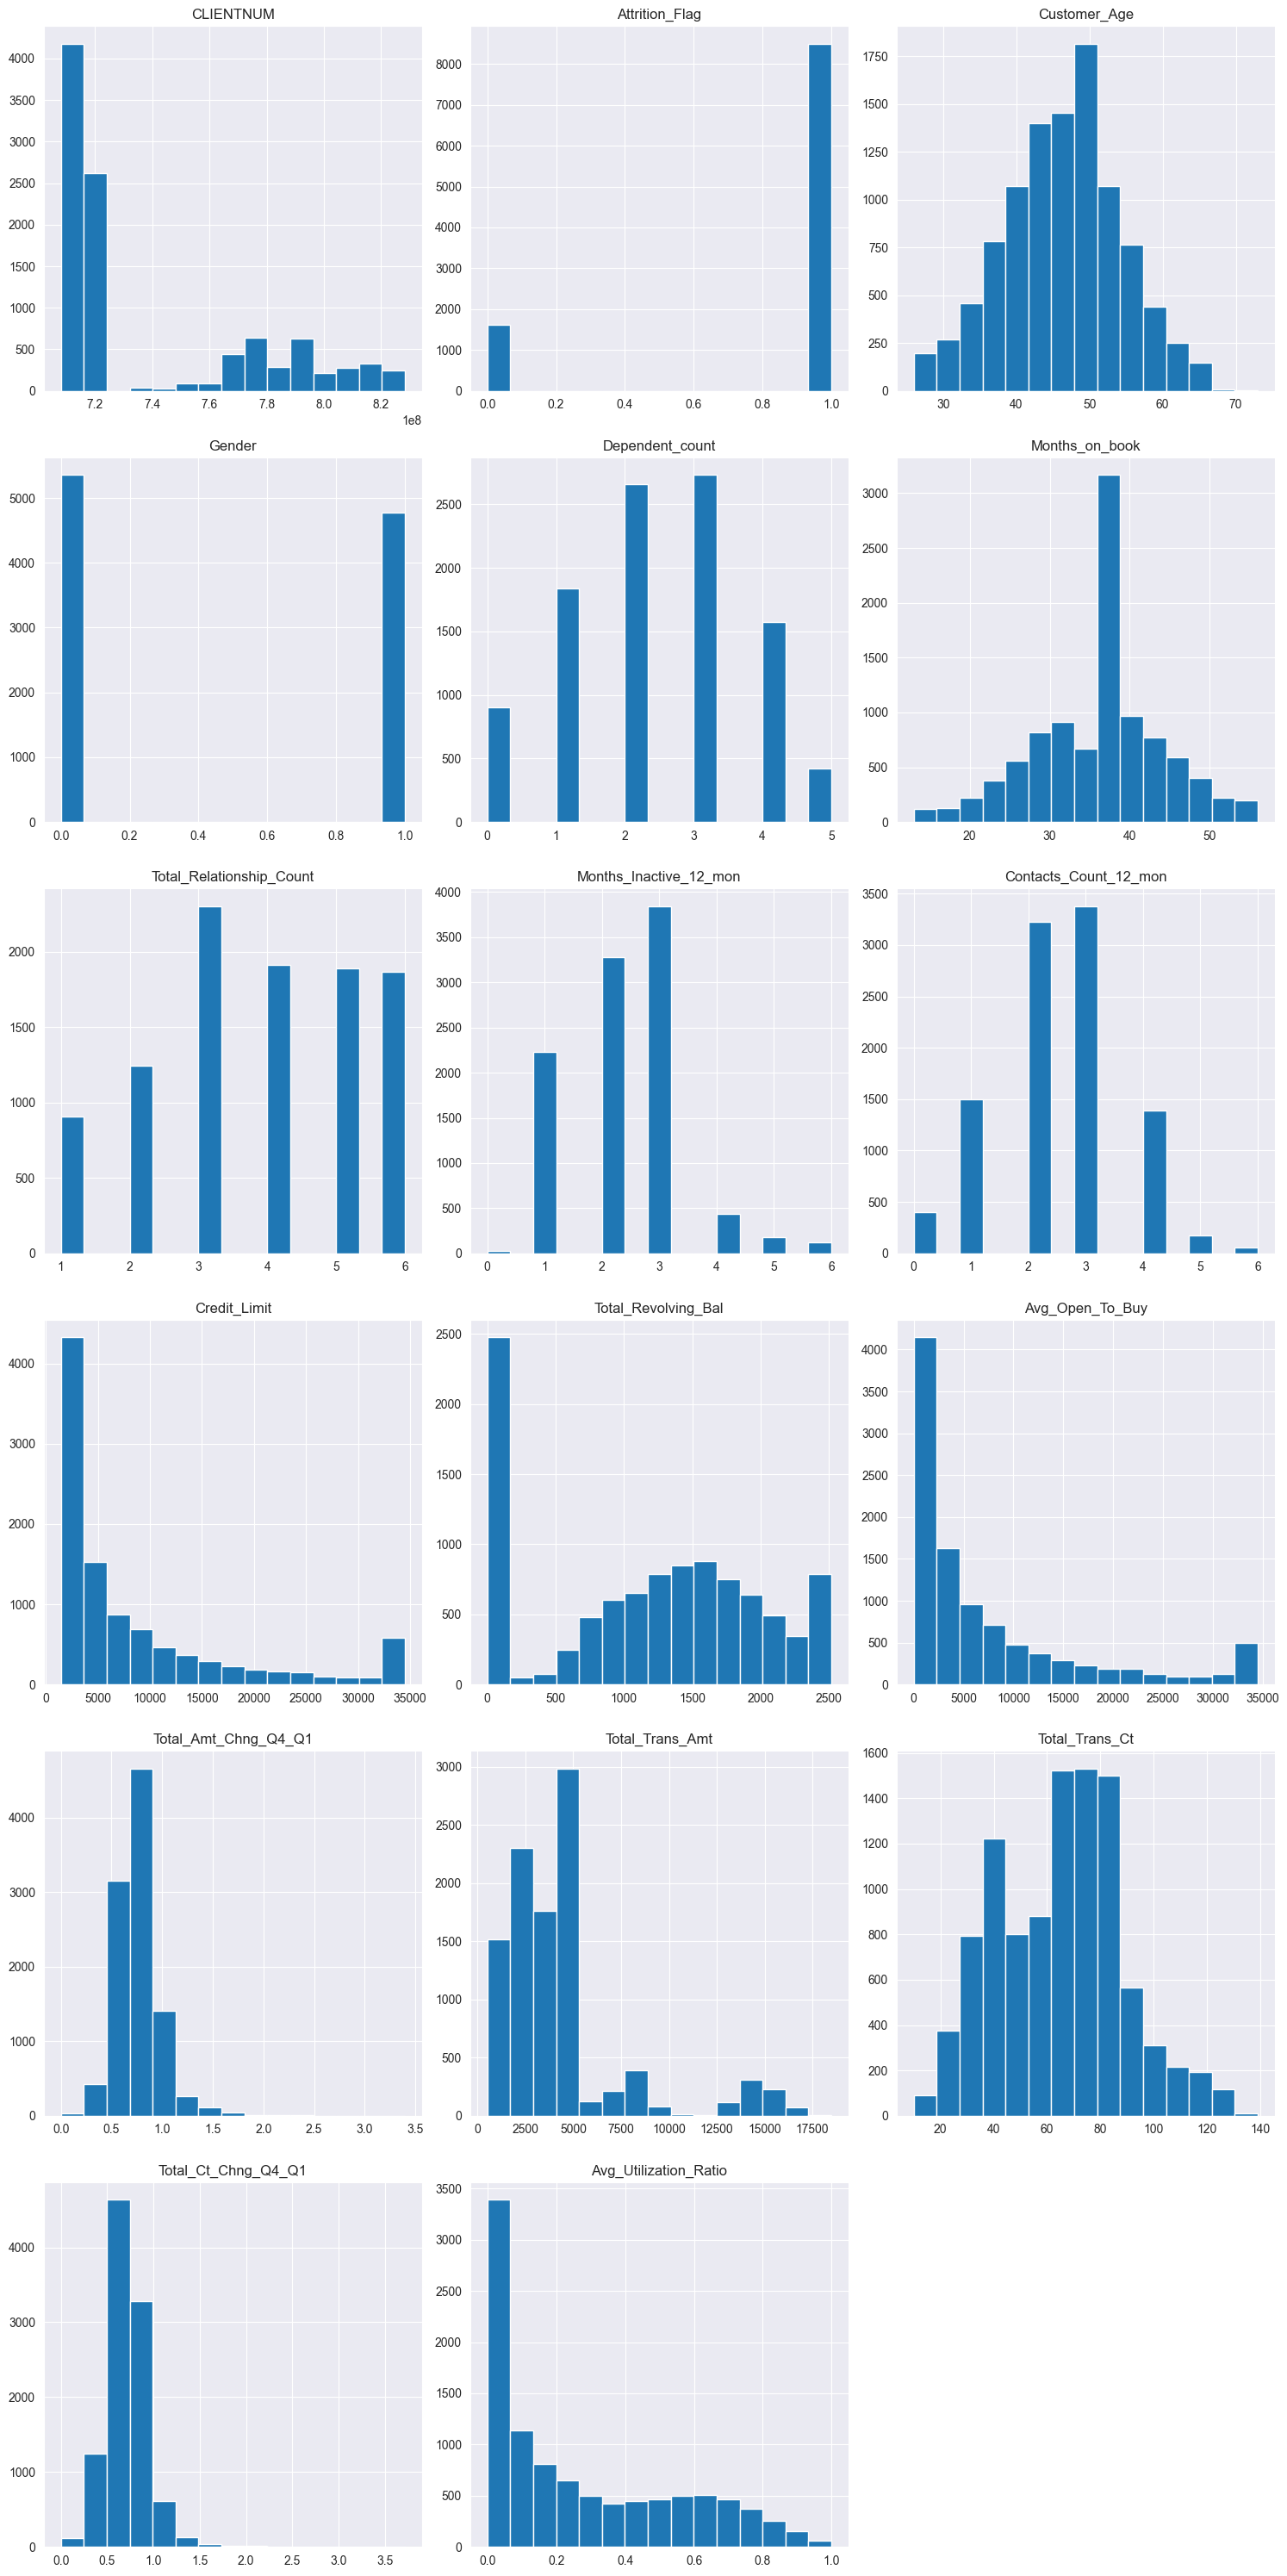

C:\Users\Becode-son\AppData\Local\Temp\ipykernel_10412\2478446983.py:36: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.



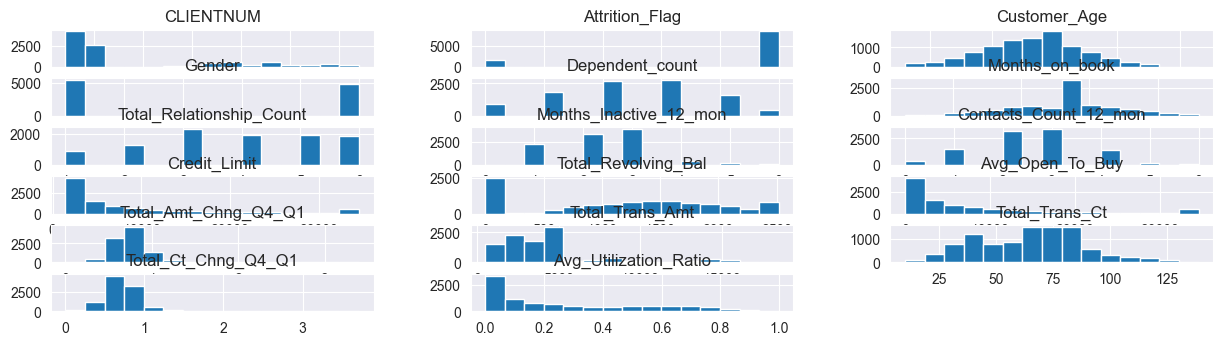

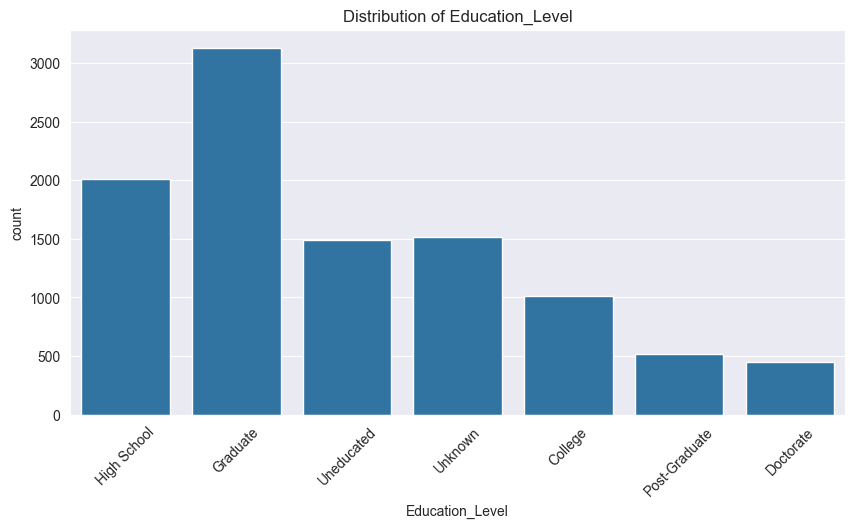

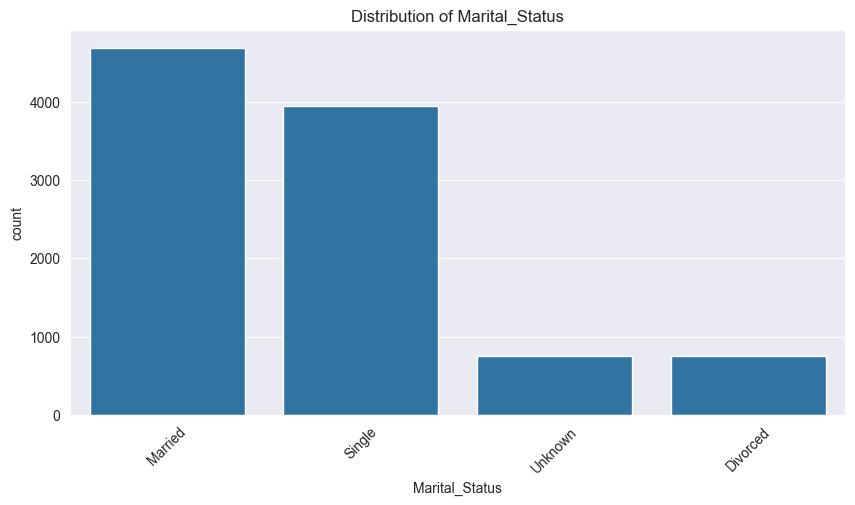

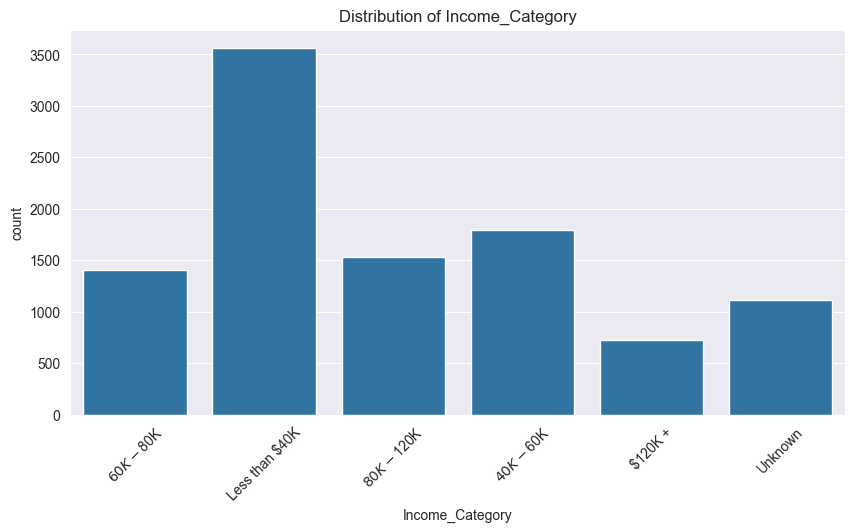

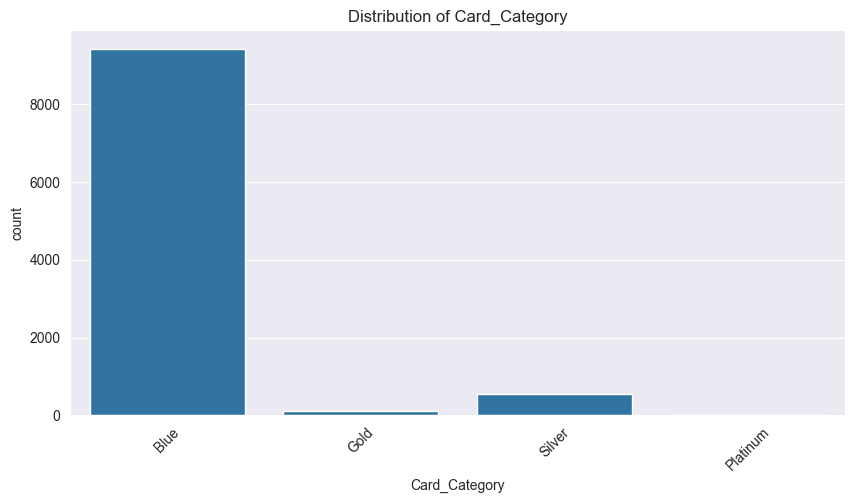

ValueError: could not convert string to float: 'High School'

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
df = churn

# Create label encoder
le = LabelEncoder()


# Convert 'Gender' to numeric
df['Gender'] = le.fit_transform(df['Gender'])
# Convert 'Attrition_Flag' to numeric
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])

# Print unique values to verify conversion
print("Original categories:", le.classes_)
print("Encoded values:", df['Attrition_Flag'].unique())

# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Adjust layout to fit all numerical features
num_features = len(numerical_features)
layout_rows = (num_features // 3) + (num_features % 3 > 0)

df[numerical_features].hist(bins=15, figsize=(15, 5 * layout_rows), layout=(layout_rows, 3))
plt.tight_layout()
plt.show()


# Visualize the distribution of numerical features
num_features = churn.select_dtypes(include=['int64', 'float64']).columns
churn[num_features].hist(bins=15, figsize=(15, 10), layout=(16, 3))
plt.tight_layout()
plt.show()

# Visualize the distribution of categorical features
categorical_features = churn.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=churn, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Correlation matrix
corr_matrix = churn.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Feature importance using RandomForestClassifier
X = churn.drop(columns=['Attrition_Flag', 'CLIENTNUM'])
y = churn['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(15, 10))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.show()

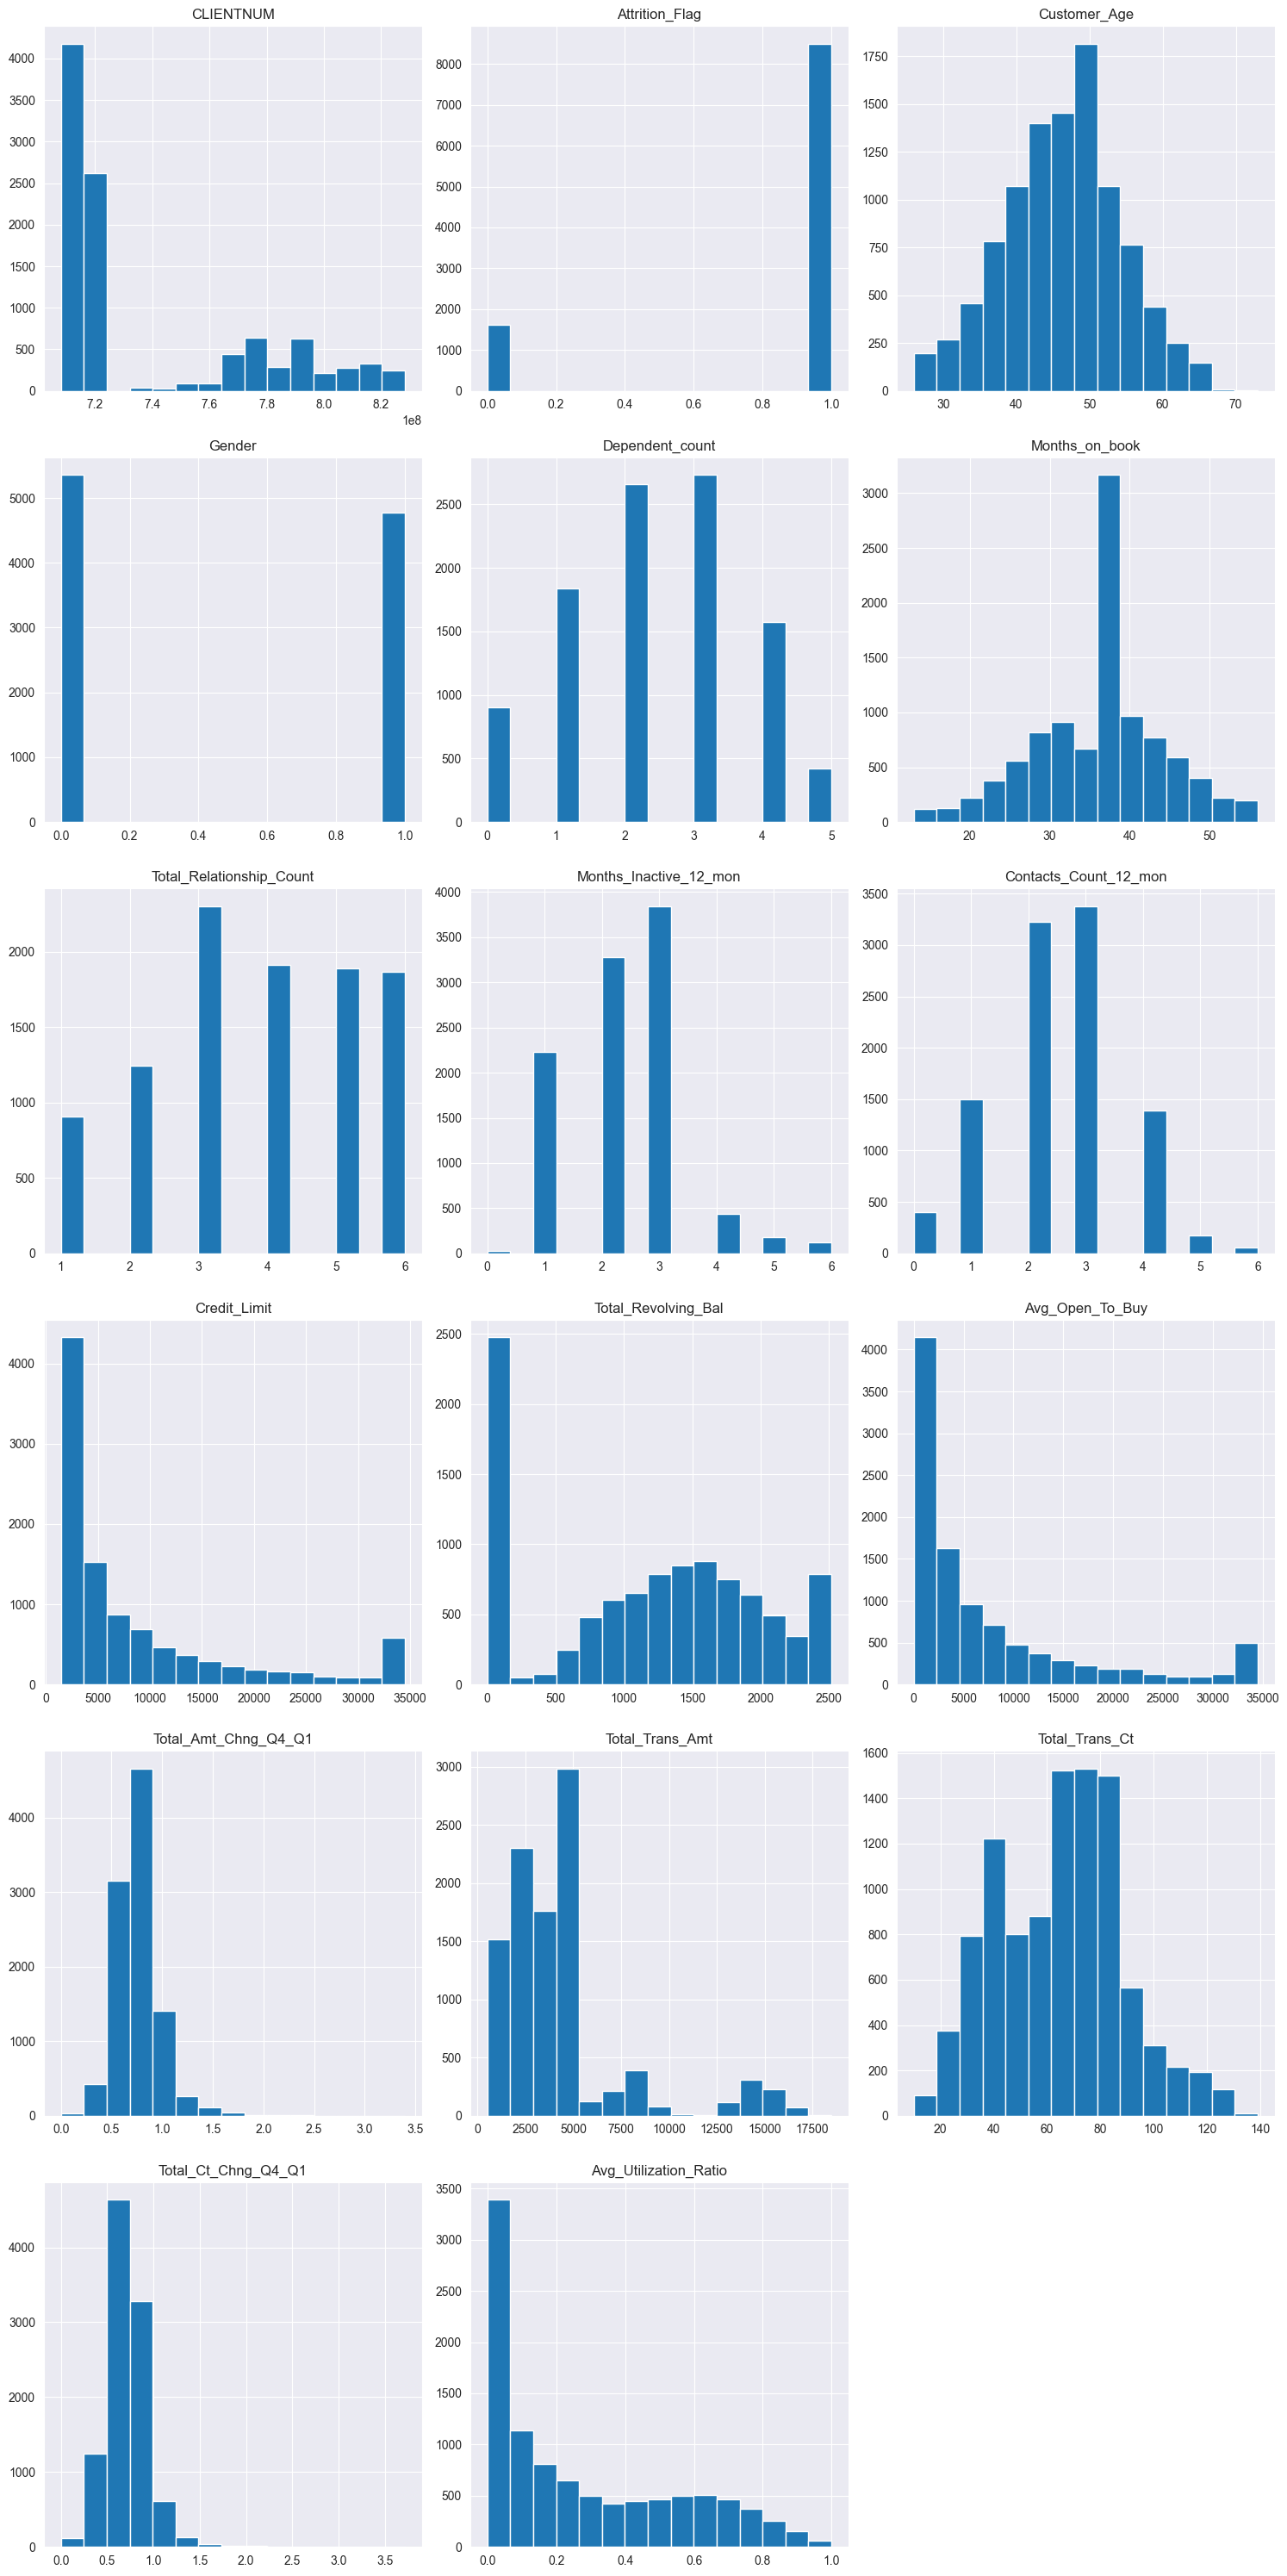

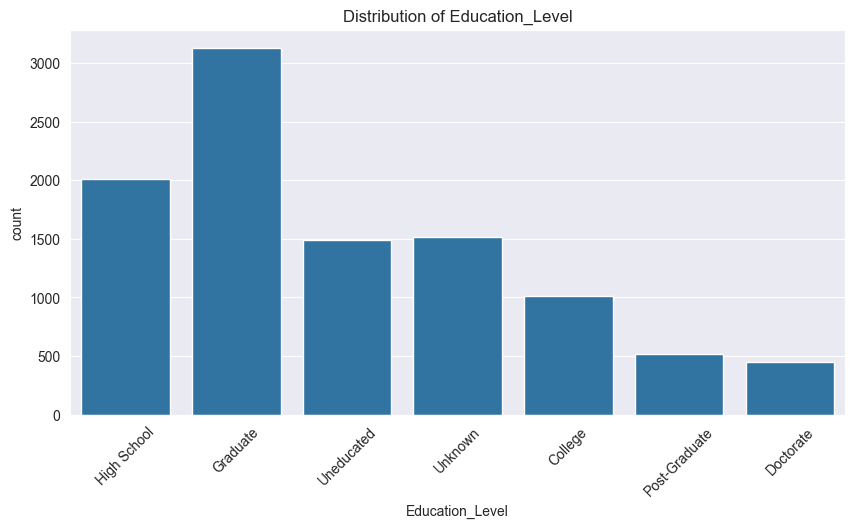

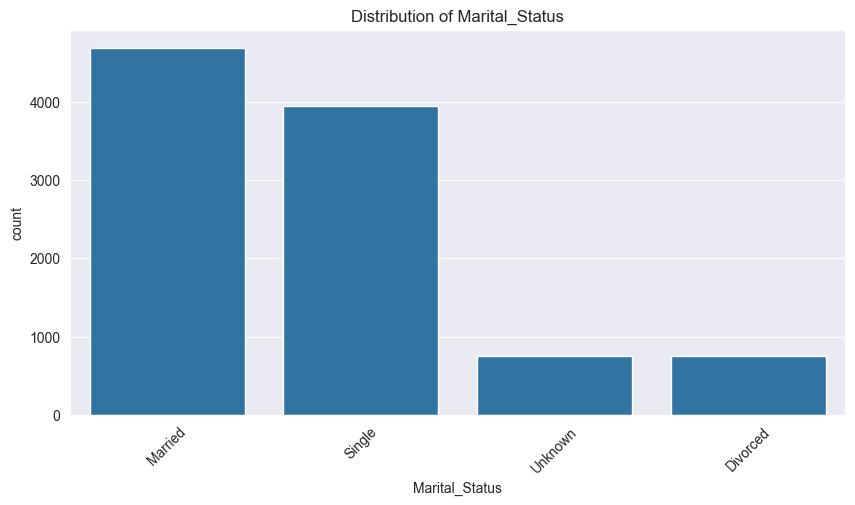

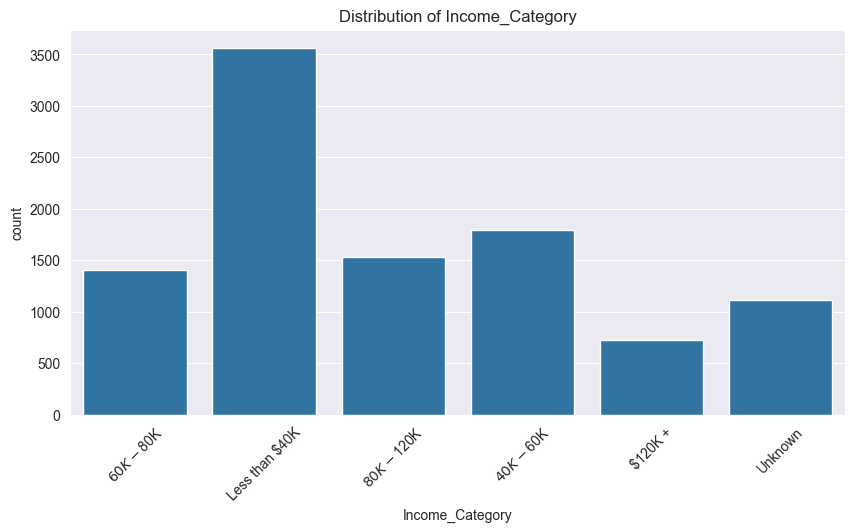

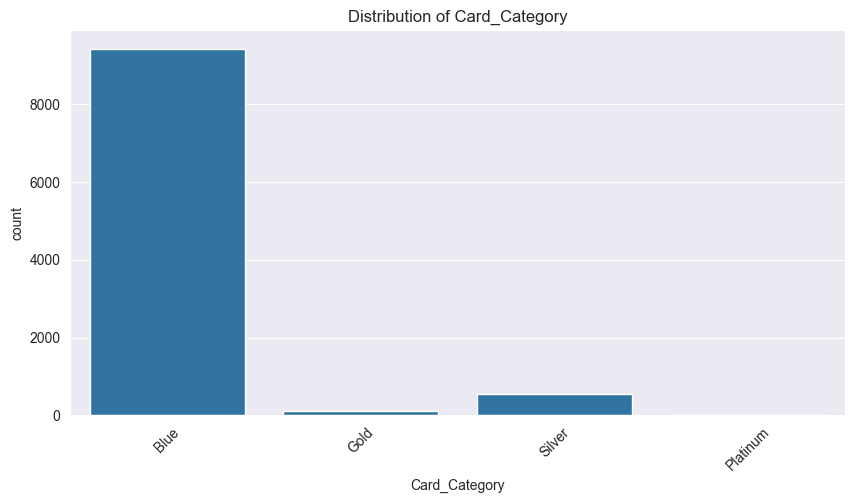

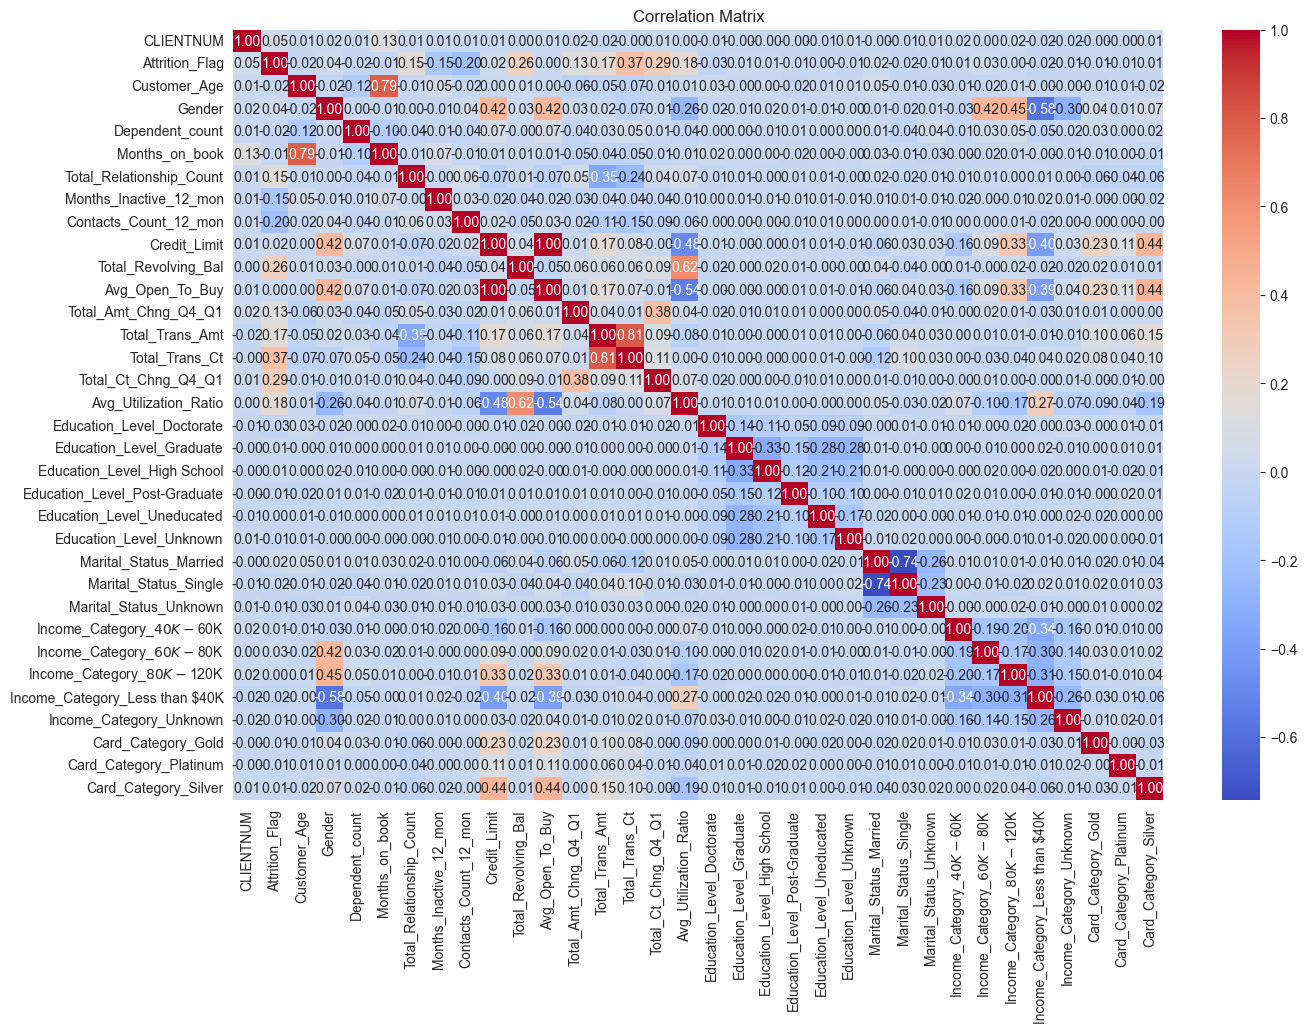

RandomForestClassifier(random_state=42)

In [8]:
# Visualize the distribution of numerical features
numerical_features = churn.select_dtypes(include=['int64', 'float64']).columns
num_features = len(numerical_features)
layout_rows = (num_features // 3) + (num_features % 3 > 0)

churn[numerical_features].hist(bins=15, figsize=(15, 5 * layout_rows), layout=(layout_rows, 3))
plt.tight_layout()
plt.show()

# Visualize the distribution of categorical features
categorical_features = churn.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=churn, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Encode categorical features for correlation matrix
churn_encoded = pd.get_dummies(churn, drop_first=True)

# Correlation matrix
corr_matrix = churn_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Feature importance using RandomForestClassifier
X = churn.drop(columns=['Attrition_Flag', 'CLIENTNUM'])
y = churn['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
#

In [15]:
#%% PlotMultiplePie 
# Input: df = Pandas dataframe, categorical_features = list of features , dropna = boolean variable to use NaN or not
# Output: prints multiple px.pie() 

def PlotMultiplePie(df,categorical_features = None,dropna = False):
    # set a threshold of 30 unique variables, more than 50 can lead to ugly pie charts 
    threshold = 30
    
    # if user did not set categorical_features 
    if categorical_features == None: 
        categorical_features = df.select_dtypes(['object','category']).columns.to_list()
        print(categorical_features)
    
    # loop through the list of categorical_features 
    for cat_feature in categorical_features: 
        num_unique = df[cat_feature].nunique(dropna = dropna)
        num_missing = df[cat_feature].isna().sum()
        # prints pie chart and info if unique values below threshold 
        if num_unique <= threshold:
            print('Pie Chart for: ', cat_feature)
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            fig = px.pie(df[cat_feature].value_counts(dropna = dropna), values=cat_feature, 
                 names = df[cat_feature].value_counts(dropna = dropna).index,title = cat_feature,template='ggplot2')
            fig.show()
        else: 
            print('Pie Chart for ',cat_feature,' is unavailable due high number of Unique Values ')
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            print('\n')

In [ ]:


#%% Print the continous features in the dataset 
continous_features = data_raw.select_dtypes(['float64']).columns.to_list()

for cont_feature in continous_features: 
    plt.figure()
    plt.title(cont_feature)
    ax = sns.distplot(data_raw[cont_feature])

